<a href="https://colab.research.google.com/github/XinyaoT/pytorch-deep-learning/blob/main/mynotes/03_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* torchvision
* torchvision.datasets
* torchvision.models——pretrain
* torchvision.transforms——image2tensor
* torch.utils.data.Dataset——base dataset in pytorch
* torch.utils.data.DataLoader——创建一个可迭代的对象

In [2]:
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

##1.  get dataset

In [3]:
from torchvision import datasets
# 返回元组
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 231kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 4.22MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.0MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
# see the first train examples
image,label = train_data[0]
image,label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [10]:
train_data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

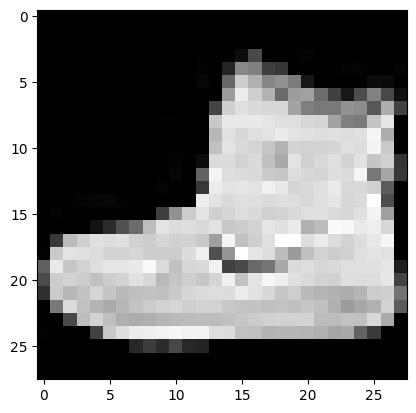

In [11]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(),cmap="gray")
plt.show()

## 2.  dataloader
data into batch mini-batch

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE)

In [16]:
print(f"train dataloader: {train_dataloader}")
print(f"test dataloader: {test_dataloader}")
print(f"train dataloader len: {len(train_dataloader)}")
print(f"test dataloader len: {len(test_dataloader)}")

train dataloader: <torch.utils.data.dataloader.DataLoader object at 0x782b70d46020>
test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x782b70d46350>
train dataloader len: 1875
test dataloader len: 313


In [17]:
# dataloader是一个可迭代的对象
# 查看dataloader里面具体是什么
train_features,train_labels = next(iter(train_dataloader))
print(f"train features: {train_features.shape}")
print(f"train labels: {train_labels.shape}")

train features: torch.Size([32, 1, 28, 28])
train labels: torch.Size([32])


##3. build a baseline model


> dataloader是一个迭代器，内部实现了__iter__和__next__方法



In [36]:
# flatten

flatten_layer = torch.nn.Flatten()
x= next(iter(train_dataloader))
# next 返回一个列表
x[0].shape


torch.Size([32, 1, 28, 28])

In [25]:
flatten_layer(x[0]).shape
# 展平除了batchsize的后面维度

torch.Size([32, 784])

In [60]:
from torch import nn
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        # nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=784,hidden_units=10,output_shape=10).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 loss & optimizer


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [34]:
# 创建模型后检查形状
dummy_x = torch.rand([1,1,28,28,]).to(device)
model_0(dummy_x).shape

torch.Size([1, 10])

In [38]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)
torch.manual_seed(42)
epochs = 3

###3.2记时


In [35]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
import torch
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
start_time = timer()
# some code
end_time = timer()
print_train_time(start_time, end_time,device=device)

Train time on cpu: 0.000 seconds


4.322799986766768e-05

### 3.3 Train loop
1. loop each loop
2. loop per batch


In [64]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)
# 训练
train_time_start_on_cpu = timer()
epochs =3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}")
  # train
  train_loss = 0
  # 一次加载32个样本标签对
  for batch,(X,y) in enumerate(train_dataloader):
    # print(f"batch: {batch}|y.shape：{y.shape}")
    model_0.train()
    X,y = X.to(device),y.to(device)
    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"loss: {loss.item()}")
  train_loss /= len(train_dataloader)

  # test
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      X,y = X.to(device),y.to(device)
      test_pred = model_0(X)
      loss = loss_fn(test_pred,y)
      test_loss += loss
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f"train_loss: {train_loss}|test_loss: {test_loss}|test_acc: {test_acc}")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
loss: 2.366476535797119
loss: 2.2521889209747314
loss: 2.283979654312134
loss: 2.3598690032958984
loss: 2.3558104038238525
train_loss: 2.3184654712677|test_loss: 2.3190648555755615|test_acc: 10.852635782747603
epoch: 1
loss: 2.2989275455474854
loss: 2.336374521255493
loss: 2.2916054725646973
loss: 2.2992758750915527
loss: 2.3280110359191895
train_loss: 2.3184657096862793|test_loss: 2.3190648555755615|test_acc: 10.852635782747603
epoch: 2
loss: 2.342811346054077
loss: 2.3153235912323
loss: 2.242898464202881
loss: 2.3862404823303223
loss: 2.3318514823913574
train_loss: 2.3184657096862793|test_loss: 2.3190648555755615|test_acc: 10.852635782747603


##4. 通用的模型评估函数

In [44]:
def eval_model(model:nn.Module,data_loader:DataLoader,loss_fn:nn.Module,accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"model_acc":acc}

eval_model(model_0,test_dataloader,loss_fn,accuracy_fn)

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4619934856891632,
 'model_acc': 84.1952875399361}

##5.通用的 train& test 函数

In [61]:
def train_step(model:nn.Module,
        dataloader:DataLoader,
               accuracy_fn,
        loss_fn:nn.Module,
        optimizer:torch.optim.Optimizer,
        device):
  train_loss,train_acc = 0,0
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    # print(f"batch: {batch}|y.shape：{y.shape}")
    model_0.train()
    X,y = X.to(device),y.to(device)
    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(f"loss: {loss.item()}")
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"train loss:{train_loss},train_acc:{train_acc}")
  return train_loss,train_acc

In [62]:
def test_step(model:nn.Module,
        dataloader:DataLoader,
        loss_fn:nn.Module,
        accuracy_fn,
        device):
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
      X,y = X.to(device),y.to(device)
      test_pred = model(X)
      loss = loss_fn(test_pred,y)
      test_loss += loss
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"test loss:{test_loss},test_acc:{test_acc}")
  return test_loss,test_acc

In [63]:
torch.manual_seed(42)

from timeit import default_timer as timer
from tqdm.auto import tqdm
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n------------------")
  train_step(model=model_0,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device = device)
  test_step(model=model_0,dataloader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
------------------
train loss:2.3184654712677,train_acc:11.071666666666667
test loss:2.3190648555755615,test_acc:10.852635782747603
epoch: 1
------------------
train loss:2.3184657096862793,train_acc:11.071666666666667
test loss:2.3190648555755615,test_acc:10.852635782747603
epoch: 2
------------------
train loss:2.3184657096862793,train_acc:11.071666666666667
test loss:2.3190648555755615,test_acc:10.852635782747603
Train time on cpu: 32.406 seconds


#building CNN


In [65]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )
  def forward(self,x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [66]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=10).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [67]:
# 模拟数据验证
images = torch.rand(size=(32,1,28,28)).to(device)
y = model_2(images)
y.shape

torch.Size([32, 10])

In [68]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)
torch.manual_seed(42)

##7.4 train

In [69]:
torch.manual_seed(42)

from timeit import default_timer as timer
from tqdm.auto import tqdm
train_time_start_on_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epochs:{epoch}\n---------")
  train_step(model=model_2,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device = device)
  test_step(model=model_2,dataloader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
train_time_end_on_cpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,device=str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epochs:0
---------
train loss:2.3184654712677,train_acc:11.071666666666667
test loss:2.3023064136505127,test_acc:9.994009584664537
epochs:1
---------
train loss:2.3184657096862793,train_acc:11.071666666666667
test loss:2.3023064136505127,test_acc:9.994009584664537
epochs:2
---------
train loss:2.3184657096862793,train_acc:11.071666666666667
test loss:2.3023064136505127,test_acc:9.994009584664537
Train time on cpu: 51.882 seconds


In [72]:
import pandas as pd
# 模型对比
model_2_results = eval_model(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}

In [73]:
compare_results = pd.DataFrame(data=[model_0.state_dict(),model_2.state_dict()])
compare_results

,layer_stack.1.weight,layer_stack.1.bias,layer_stack.2.weight,layer_stack.2.bias,conv_block_1.0.weight,conv_block_1.0.bias,conv_block_1.2.weight,conv_block_1.2.bias,conv_block_2.0.weight,conv_block_2.0.bias,conv_block_2.2.weight,conv_block_2.2.bias,classifier.1.weight,classifier.1.bias
0,"[[tensor(0.0273), tensor(0.0296), tensor(-0.00...","[tensor(-0.0093), tensor(0.0283), tensor(-0.00...","[[tensor(0.0614), tensor(-0.0687), tensor(0.00...","[tensor(-0.0087), tensor(0.1791), tensor(0.271...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"[[[tensor([ 0.2548, 0.2767, -0.0781]), tensor...","[tensor(0.0705), tensor(-0.0850), tensor(0.198...","[[[tensor([-0.0604, 0.0263, -0.0139]), tensor...","[tensor(0.0484), tensor(-0.0479), tensor(-0.05...","[[[tensor([ 0.0274, -0.0853, -0.0638]), tensor...","[tensor(-0.0878), tensor(-0.0309), tensor(0.07...","[[[tensor([-0.0640, -0.0788, -0.0196]), tensor...","[tensor(0.0412), tensor(-0.0599), tensor(0.031...","[[tensor(0.0245), tensor(-0.0240), tensor(-0.0...","[tensor(0.0320), tensor(-0.0445), tensor(0.024..."
